In [53]:
import pandas as pd
from database_utils import DatabaseConnector as dc

import numpy as np
import nbformat
import plotly.express as px
import missingno as msno


database_connector = dc()
credentials = database_connector.read_db_creds('db_creds.yaml')
engine = database_connector.init_db_engine(credentials)

# Import data from 'legacy_store_details' table into DataFrame
legacy_store_details_df = pd.read_sql('legacy_store_details', engine)

# Display the DataFrame
display(legacy_store_details_df)

,index,address,longitude,lat,locality,store_code,staff_numbers,opening_date,store_type,latitude,country_code,continent
0,1,"Flat 72W\nSally isle\nEast Deantown\nE7B 8EB, ...",51.62907,None,High Wycombe,HI-9B97EE4E,34,1996-10-25,Local,-0.74934,GB,Europe
1,2,"Heckerstraße 4/5\n50491 Säckingen, Landshut",48.52961,None,Landshut,LA-0772C7B9,92,2013-04-12,Super Store,12.16179,DE,Europe
2,3,"5 Harrison tunnel\nSouth Lydia\nWC9 2BE, Westbury",51.26,None,Westbury,WE-1DE82CEE,69,2014-01-02,Super Store,-2.1875,GB,Europe
3,4,Studio 6\nStephen landing\nSouth Simon\nB77 2W...,53.0233,None,Belper,BE-18074576,35,2019-09-09,Local,-1.48119,GB,Europe
4,5,Flat 92u\nChristian harbors\nPort Charlotte\nN...,53.38333,None,Gainsborough,GA-CAD01AC2,36,1995-05-15,Local,-0.76667,GB,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...
446,446,"Täschestraße 25\n39039 Nördlingen, Kirchlengern",52.2,None,Kirchlengern,KI-78096E8C,61,2005-05-12,Super Store,8.63333,DE,Europe
447,447,K0ODETRLS3,K8CXLZDP07,UXMWDMX1LC,3VHFDNP8ET,9D4LK7X4LZ,D23PCWSM6S,36IIMAQD58,NN04B3F6UQ,JZP8MIJTPZ,B3EH2ZGQAV,1WZB1TE1HL
448,448,"Studio 8\nMoss mall\nWest Linda\nM0E 6XR, High...",51.62907,None,High Wycombe,HI-EEA7AE62,33,1998-05-14,Local,-0.74934,GB,Europe
449,449,"Baumplatz 6\n80114 Kötzting, Bretten",49.03685,None,Bretten,BR-662EC74C,35,2020-10-17,Local,8.70745,DE,Europe


In [54]:
# Make a copy of the DataFrame
legacy_store_details_df_original = legacy_store_details_df.copy()

print("Display the DataFrame:\n")
display(legacy_store_details_df.info())
display(legacy_store_details_df.describe(include='all'))

Display the DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          451 non-null    int64 
 1   address        451 non-null    object
 2   longitude      451 non-null    object
 3   lat            11 non-null     object
 4   locality       451 non-null    object
 5   store_code     451 non-null    object
 6   staff_numbers  451 non-null    object
 7   opening_date   451 non-null    object
 8   store_type     451 non-null    object
 9   latitude       450 non-null    object
 10  country_code   451 non-null    object
 11  continent      451 non-null    object
dtypes: int64(1), object(11)
memory usage: 42.4+ KB


None

,index,address,longitude,lat,locality,store_code,staff_numbers,opening_date,store_type,latitude,country_code,continent
count,451.000000,451,451,11,451,451,451,451,451,450,451,451
unique,NaN,449,125,9,125,449,114,440,13,124,11,12
top,NaN,NULL,53.46506,NULL,Chapletown,NULL,20,2004-01-23,Local,-1.47217,GB,Europe
freq,NaN,3,14,3,14,3,18,3,255,14,266,383
mean,225.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,130.336743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,112.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,225.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,337.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
print("Check how many missing values each column has:\n")
legacy_store_details_df_null = legacy_store_details_df.isnull()  # .isna() is the same as .isnull()
display(legacy_store_details_df_null)

print("Number of missing values in each column:\n")
display(legacy_store_details_df_null.sum())

Check how many missing values each column has:



,index,address,longitude,lat,locality,store_code,staff_numbers,opening_date,store_type,latitude,country_code,continent
0,False,False,False,True,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
446,False,False,False,True,False,False,False,False,False,False,False,False
447,False,False,False,False,False,False,False,False,False,False,False,False
448,False,False,False,True,False,False,False,False,False,False,False,False
449,False,False,False,True,False,False,False,False,False,False,False,False


Number of missing values in each column:



index              0
address            0
longitude          0
lat              440
locality           0
store_code         0
staff_numbers      0
opening_date       0
store_type         0
latitude           1
country_code       0
continent          0
dtype: int64

In [56]:
# Check the percentage of nulls in each column
missing_percentage_each_column = (legacy_store_details_df.isnull().sum() / legacy_store_details_df.shape[0]) * 100
print("Percentage of missing values in each column:\n")
print(missing_percentage_each_column)

Percentage of missing values in each column:

index             0.000000
address           0.000000
longitude         0.000000
lat              97.560976
locality          0.000000
store_code        0.000000
staff_numbers     0.000000
opening_date      0.000000
store_type        0.000000
latitude          0.221729
country_code      0.000000
continent         0.000000
dtype: float64


<Axes: >

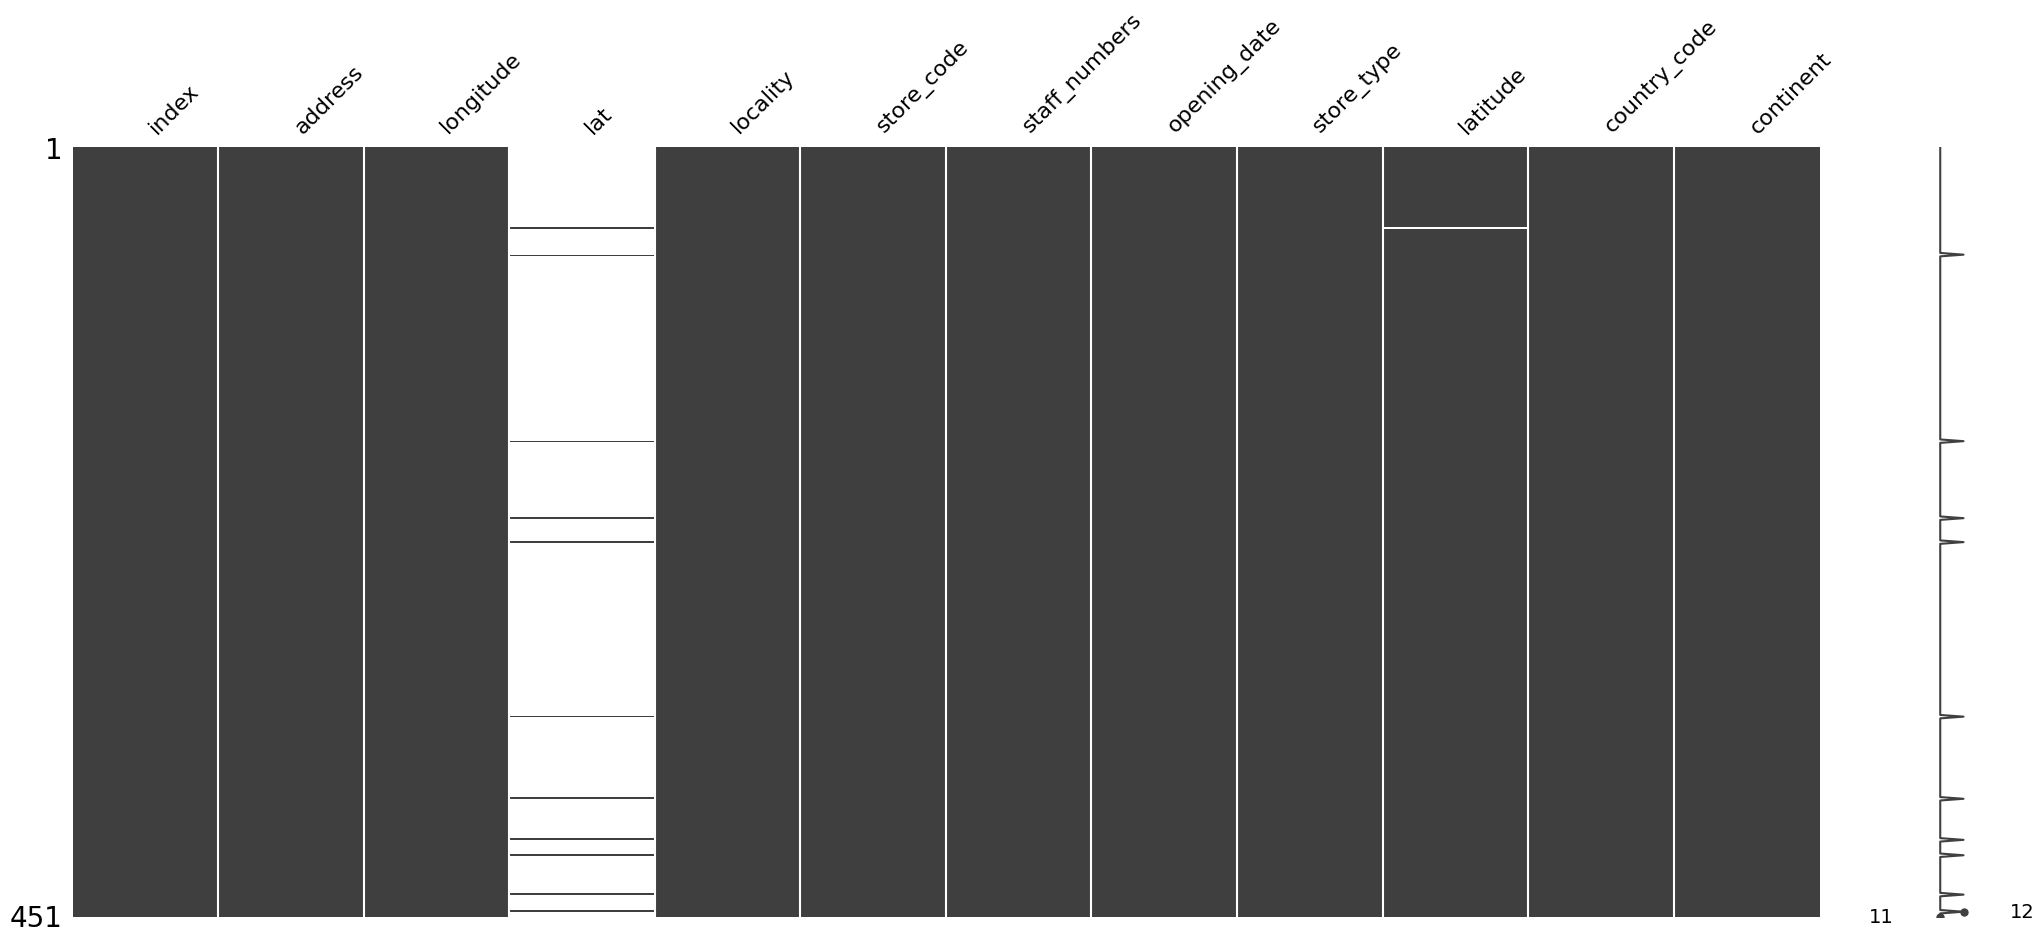

In [57]:
# Visualising Missing Data
import missingno as msno

msno.matrix(legacy_store_details_df)

In [58]:
# Drop specified columns
columns_to_drop = ['lat']
legacy_store_details_df = legacy_store_details_df.drop(columns=columns_to_drop)

print("Original DataFrame:\n")
display(legacy_store_details_df_original)

print("Upto date DataFrame:\n")
display(legacy_store_details_df)

Original DataFrame:



,index,address,longitude,lat,locality,store_code,staff_numbers,opening_date,store_type,latitude,country_code,continent
0,1,"Flat 72W\nSally isle\nEast Deantown\nE7B 8EB, ...",51.62907,None,High Wycombe,HI-9B97EE4E,34,1996-10-25,Local,-0.74934,GB,Europe
1,2,"Heckerstraße 4/5\n50491 Säckingen, Landshut",48.52961,None,Landshut,LA-0772C7B9,92,2013-04-12,Super Store,12.16179,DE,Europe
2,3,"5 Harrison tunnel\nSouth Lydia\nWC9 2BE, Westbury",51.26,None,Westbury,WE-1DE82CEE,69,2014-01-02,Super Store,-2.1875,GB,Europe
3,4,Studio 6\nStephen landing\nSouth Simon\nB77 2W...,53.0233,None,Belper,BE-18074576,35,2019-09-09,Local,-1.48119,GB,Europe
4,5,Flat 92u\nChristian harbors\nPort Charlotte\nN...,53.38333,None,Gainsborough,GA-CAD01AC2,36,1995-05-15,Local,-0.76667,GB,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...
446,446,"Täschestraße 25\n39039 Nördlingen, Kirchlengern",52.2,None,Kirchlengern,KI-78096E8C,61,2005-05-12,Super Store,8.63333,DE,Europe
447,447,K0ODETRLS3,K8CXLZDP07,UXMWDMX1LC,3VHFDNP8ET,9D4LK7X4LZ,D23PCWSM6S,36IIMAQD58,NN04B3F6UQ,JZP8MIJTPZ,B3EH2ZGQAV,1WZB1TE1HL
448,448,"Studio 8\nMoss mall\nWest Linda\nM0E 6XR, High...",51.62907,None,High Wycombe,HI-EEA7AE62,33,1998-05-14,Local,-0.74934,GB,Europe
449,449,"Baumplatz 6\n80114 Kötzting, Bretten",49.03685,None,Bretten,BR-662EC74C,35,2020-10-17,Local,8.70745,DE,Europe


Upto date DataFrame:



,index,address,longitude,locality,store_code,staff_numbers,opening_date,store_type,latitude,country_code,continent
0,1,"Flat 72W\nSally isle\nEast Deantown\nE7B 8EB, ...",51.62907,High Wycombe,HI-9B97EE4E,34,1996-10-25,Local,-0.74934,GB,Europe
1,2,"Heckerstraße 4/5\n50491 Säckingen, Landshut",48.52961,Landshut,LA-0772C7B9,92,2013-04-12,Super Store,12.16179,DE,Europe
2,3,"5 Harrison tunnel\nSouth Lydia\nWC9 2BE, Westbury",51.26,Westbury,WE-1DE82CEE,69,2014-01-02,Super Store,-2.1875,GB,Europe
3,4,Studio 6\nStephen landing\nSouth Simon\nB77 2W...,53.0233,Belper,BE-18074576,35,2019-09-09,Local,-1.48119,GB,Europe
4,5,Flat 92u\nChristian harbors\nPort Charlotte\nN...,53.38333,Gainsborough,GA-CAD01AC2,36,1995-05-15,Local,-0.76667,GB,Europe
...,...,...,...,...,...,...,...,...,...,...,...
446,446,"Täschestraße 25\n39039 Nördlingen, Kirchlengern",52.2,Kirchlengern,KI-78096E8C,61,2005-05-12,Super Store,8.63333,DE,Europe
447,447,K0ODETRLS3,K8CXLZDP07,3VHFDNP8ET,9D4LK7X4LZ,D23PCWSM6S,36IIMAQD58,NN04B3F6UQ,JZP8MIJTPZ,B3EH2ZGQAV,1WZB1TE1HL
448,448,"Studio 8\nMoss mall\nWest Linda\nM0E 6XR, High...",51.62907,High Wycombe,HI-EEA7AE62,33,1998-05-14,Local,-0.74934,GB,Europe
449,449,"Baumplatz 6\n80114 Kötzting, Bretten",49.03685,Bretten,BR-662EC74C,35,2020-10-17,Local,8.70745,DE,Europe


# checking of index

In [59]:
print("list of unique values for 'index'")
np.sort(legacy_store_details_df["index"].unique())

list of unique values for 'index'


array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [60]:
print("count on unique values found in 'index'")

legacy_store_details_df["index"].nunique()


count on unique values found in 'index'


451

In [61]:

unique_count = legacy_store_details_df["index"].nunique()
print(unique_count)

# Check missing values in the "stroke" column
missing_values = legacy_store_details_df["index"].isnull().sum()
print(f"Number of missing values in 'stroke': {missing_values}")


451
Number of missing values in 'stroke': 0


# checking of staff numbers

In [62]:
import pandas as pd
import re

# Assuming legacy_store_details_df is your DataFrame

# Define a regular expression to match integers without any other special characters
integer_pattern = re.compile(r'^\d+$')

'''
^: Asserts the start of the string.
\d: Matches any digit (0-9).
+: Matches one or more occurrences of the preceding element (\d in this case).
$: Asserts the end of the string.
'''

# Function to filter rows based on the regular expression
def filter_non_integers(value):
    return bool(integer_pattern.match(str(value)))

# Apply the filter to the 'staff_numbers' column
legacy_store_details_df_filtered = legacy_store_details_df[legacy_store_details_df['staff_numbers'].apply(filter_non_integers)]

# Display the result
display(legacy_store_details_df_filtered)


,index,address,longitude,locality,store_code,staff_numbers,opening_date,store_type,latitude,country_code,continent
0,1,"Flat 72W\nSally isle\nEast Deantown\nE7B 8EB, ...",51.62907,High Wycombe,HI-9B97EE4E,34,1996-10-25,Local,-0.74934,GB,Europe
1,2,"Heckerstraße 4/5\n50491 Säckingen, Landshut",48.52961,Landshut,LA-0772C7B9,92,2013-04-12,Super Store,12.16179,DE,Europe
2,3,"5 Harrison tunnel\nSouth Lydia\nWC9 2BE, Westbury",51.26,Westbury,WE-1DE82CEE,69,2014-01-02,Super Store,-2.1875,GB,Europe
3,4,Studio 6\nStephen landing\nSouth Simon\nB77 2W...,53.0233,Belper,BE-18074576,35,2019-09-09,Local,-1.48119,GB,Europe
4,5,Flat 92u\nChristian harbors\nPort Charlotte\nN...,53.38333,Gainsborough,GA-CAD01AC2,36,1995-05-15,Local,-0.76667,GB,Europe
...,...,...,...,...,...,...,...,...,...,...,...
445,445,"Flat 7\nStephanie lake\nMorrisside\nHP8 8LH, C...",50.76306,Cowes,CO-473A9FBB,94,2008-06-08,Super Store,-1.29772,GB,Europe
446,446,"Täschestraße 25\n39039 Nördlingen, Kirchlengern",52.2,Kirchlengern,KI-78096E8C,61,2005-05-12,Super Store,8.63333,DE,Europe
448,448,"Studio 8\nMoss mall\nWest Linda\nM0E 6XR, High...",51.62907,High Wycombe,HI-EEA7AE62,33,1998-05-14,Local,-0.74934,GB,Europe
449,449,"Baumplatz 6\n80114 Kötzting, Bretten",49.03685,Bretten,BR-662EC74C,35,2020-10-17,Local,8.70745,DE,Europe


In [65]:
print("legacy_store_details_df[\"staff_numbers\"] contents:\n")
print(np.sort(legacy_store_details_df["staff_numbers"].unique()), "\n")

print("Filter applied and only str integers remaining:\n")
print(np.sort(legacy_store_details_df_filtered["staff_numbers"].unique()), "\n\n\n\n")

display(legacy_store_details_df_filtered)
display(legacy_store_details_df_filtered.info())


legacy_store_details_df["staff_numbers"] contents:

['100' '101' '102' '103' '106' '107' '108' '109' '110' '111' '112' '113'
 '114' '117' '118' '119' '120' '122' '124' '127' '128' '129' '130' '131'
 '132' '133' '134' '135' '137' '138' '139' '20' '21' '22' '23' '24'
 '2429OB3LMM' '25' '26' '27' '28' '29' '30' '30e' '31' '32' '325' '33'
 '34' '35' '36' '37' '38' '39' '3n9' '4' '40' '41' '48' '5' '50' '51' '52'
 '53' '56' '57' '58' '59' '6' '60' '61' '62' '63' '66' '67' '68' '69' '7'
 '70' '71' '72' '73' '74' '74BY7HSB6P' '75' '76' '77' '78' '8' '80' '80R'
 '81' '82' '83' '84' '85' '86' '87' '89' '90' '92' '93' '94' '96' '98'
 '99' 'A97' 'BIP8K8JJW2' 'D23PCWSM6S' 'FRTGHAA34B' 'GT1FO6YGD4' 'J78'
 'NULL' 'SKBXAXF5G5'] 

Filter applied and only str integers remaining:

['100' '101' '102' '103' '106' '107' '108' '109' '110' '111' '112' '113'
 '114' '117' '118' '119' '120' '122' '124' '127' '128' '129' '130' '131'
 '132' '133' '134' '135' '137' '138' '139' '20' '21' '22' '23' '24' '25'
 '26' '

,index,address,longitude,locality,store_code,staff_numbers,opening_date,store_type,latitude,country_code,continent
0,1,"Flat 72W\nSally isle\nEast Deantown\nE7B 8EB, ...",51.62907,High Wycombe,HI-9B97EE4E,34,1996-10-25,Local,-0.74934,GB,Europe
1,2,"Heckerstraße 4/5\n50491 Säckingen, Landshut",48.52961,Landshut,LA-0772C7B9,92,2013-04-12,Super Store,12.16179,DE,Europe
2,3,"5 Harrison tunnel\nSouth Lydia\nWC9 2BE, Westbury",51.26,Westbury,WE-1DE82CEE,69,2014-01-02,Super Store,-2.1875,GB,Europe
3,4,Studio 6\nStephen landing\nSouth Simon\nB77 2W...,53.0233,Belper,BE-18074576,35,2019-09-09,Local,-1.48119,GB,Europe
4,5,Flat 92u\nChristian harbors\nPort Charlotte\nN...,53.38333,Gainsborough,GA-CAD01AC2,36,1995-05-15,Local,-0.76667,GB,Europe
...,...,...,...,...,...,...,...,...,...,...,...
445,445,"Flat 7\nStephanie lake\nMorrisside\nHP8 8LH, C...",50.76306,Cowes,CO-473A9FBB,94,2008-06-08,Super Store,-1.29772,GB,Europe
446,446,"Täschestraße 25\n39039 Nördlingen, Kirchlengern",52.2,Kirchlengern,KI-78096E8C,61,2005-05-12,Super Store,8.63333,DE,Europe
448,448,"Studio 8\nMoss mall\nWest Linda\nM0E 6XR, High...",51.62907,High Wycombe,HI-EEA7AE62,33,1998-05-14,Local,-0.74934,GB,Europe
449,449,"Baumplatz 6\n80114 Kötzting, Bretten",49.03685,Bretten,BR-662EC74C,35,2020-10-17,Local,8.70745,DE,Europe


<class 'pandas.core.frame.DataFrame'>
Index: 436 entries, 0 to 450
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          436 non-null    int64 
 1   address        436 non-null    object
 2   longitude      436 non-null    object
 3   locality       436 non-null    object
 4   store_code     436 non-null    object
 5   staff_numbers  436 non-null    object
 6   opening_date   436 non-null    object
 7   store_type     436 non-null    object
 8   latitude       435 non-null    object
 9   country_code   436 non-null    object
 10  continent      436 non-null    object
dtypes: int64(1), object(10)
memory usage: 40.9+ KB


None